# Lab 1 Example – Auto Prices 

## 1. Imports

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 2. Load the dataset


In [62]:
df = pd.read_csv("automobile_price_data3.csv")
df.head()

,normalized-losses,make,fuel,doors,body,drive,weight,engine-size,bhp,mpg,price
0,NaN,alfa-romero,unleaded,two,convertible,rwd,2548,130,111.0,27,13495.0
1,NaN,alfa-romero,unleaded,two,convertible,rwd,2548,130,111.0,27,16500.0
2,NaN,alfa-romero,unleaded,two,hatchback,rwd,2823,152,154.0,26,16500.0
3,164.0,audi,unleaded,four,saloon,fwd,2337,109,102.0,30,13950.0
4,164.0,audi,unleaded,four,saloon,4wd,2824,136,115.0,22,17450.0


## 3. Explore Data

In [63]:
print(df.keys())
print()
df.info()
df.head(10)
df.tail(5)

Index(['normalized-losses', 'make', 'fuel', 'doors', 'body', 'drive', 'weight',
       'engine-size', 'bhp', 'mpg', 'price'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   make               205 non-null    object 
 2   fuel               205 non-null    object 
 3   doors              203 non-null    object 
 4   body               205 non-null    object 
 5   drive              205 non-null    object 
 6   weight             205 non-null    int64  
 7   engine-size        205 non-null    int64  
 8   bhp                203 non-null    float64
 9   mpg                205 non-null    int64  
 10  price              201 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 17.7+ KB


,normalized-losses,make,fuel,doors,body,drive,weight,engine-size,bhp,mpg,price
200,95.0,volvo,unleaded,four,saloon,rwd,2952,141,114.0,28,16845.0
201,95.0,volvo,unleaded,four,saloon,rwd,3049,141,160.0,25,19045.0
202,95.0,volvo,unleaded,four,saloon,rwd,3012,173,134.0,23,21485.0
203,95.0,volvo,diesel,four,saloon,rwd,3217,145,106.0,27,22470.0
204,95.0,volvo,unleaded,four,saloon,rwd,3062,141,114.0,25,22625.0


## 4. Visualize Numeric Distributions

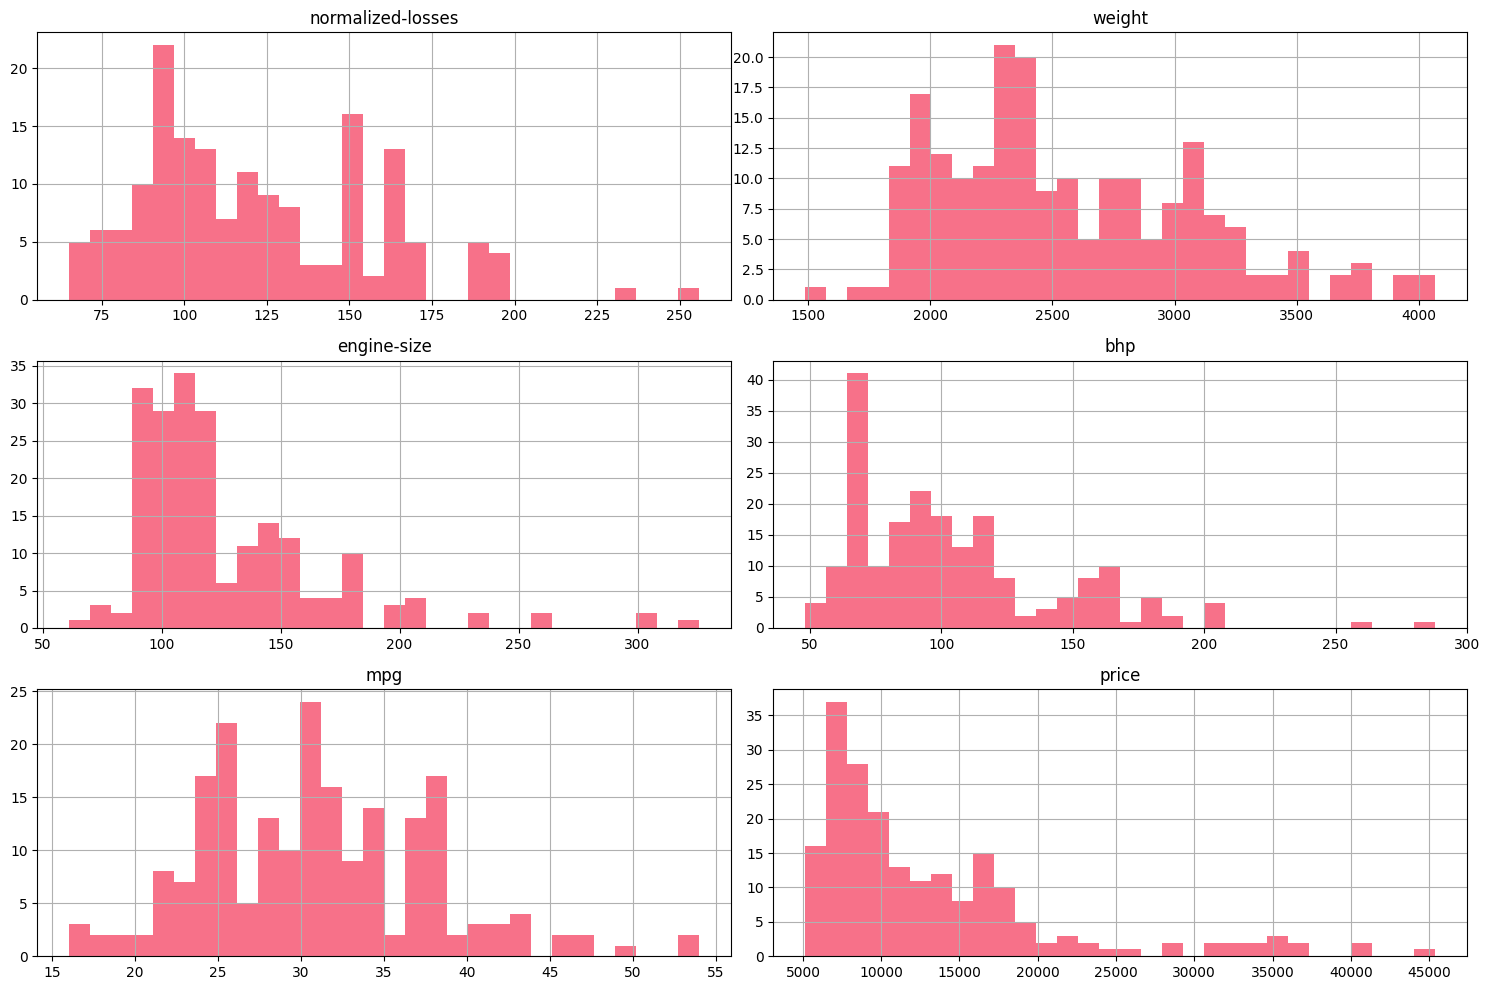

In [64]:
plt.style.use('default')
sns.set_palette("husl")

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## 5. Data Cleaning

In [65]:
df.drop(axis='columns', labels='normalized-losses', inplace=True, errors='ignore')
df.dropna(axis='index', how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 204
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   make         197 non-null    object 
 1   fuel         197 non-null    object 
 2   doors        197 non-null    object 
 3   body         197 non-null    object 
 4   drive        197 non-null    object 
 5   weight       197 non-null    int64  
 6   engine-size  197 non-null    int64  
 7   bhp          197 non-null    float64
 8   mpg          197 non-null    int64  
 9   price        197 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 16.9+ KB


In [66]:
## 6. Split the Data

In [67]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))

157 40


In [68]:
## 7. Define Features and Target

In [69]:
X_train = train_set[['weight', 'engine-size', 'bhp', 'mpg']]
y_train = train_set['price']

X_test = test_set[['weight', 'engine-size', 'bhp', 'mpg']]
y_test = test_set['price']

## 8. Create and Train Model

In [70]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print("Bias:", reg.intercept_)
print("Coefficients:", reg.coef_)
print("Training Score:", reg.score(X_train, y_train))

Bias: -17922.52413652654
Coefficients: [ 4.58631495 82.32373485 66.79759309 72.85364667]
Training Score: 0.8230155353613751


## 9. Evaluate Model on Test Set

In [71]:
print("Test Score:", reg.score(X_test, y_test))

Test Score: 0.5528901621626465


## 10. Interpretation
> - A score around **0.55** (55%) indicates moderate predictive power.
> - The model explains about half of the variation in `price`.
> - Adjusting feature selection or handling missing data differently may improve results.
> - Consider scaling features or testing non-linear models later.